# The NYC Crime Rate Analysis Project

## The Aim of Project : this project aims basically to study the complaints data , and try to provide a depped analysis about certain type of questions and situation related to the type of complaints and the different type of demographic indicators .


## The Aim Of The Project

### This projects aims to use some tools in variuos python libraraies in order to analze a datset and get some usefull information from .

### specifically to this projects there are some questions im looking forawrd to answer 
### and they are as the following :

### 1- How does this complains distribute with different type of genders ? 
###  2- does a certain group of people ( age group - ethnicity ... etc ) face more type of crimes in general ? or within certain area ?
### 3- Is it safe to stay/live in a certain area in NYC ?
### 4- What type of crimes you should expect to face in general in NYC ?


#  The Data Set : ##

### The data set in named "NYPD Complaint Data Historic" which is provided by NYC open data website acessed through the link : https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

### This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019). 

### It consists of one raw data file with the size of 2.75 GB .


## 1. Reading The File
**Reading the file and checking the exisitance of columns with correct encoding**

In [156]:
# reading the csv file and assigning it to a data frame , plus calculationg the time to read the file in seconds

import pandas as pd
import time

start = time.time()
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv',low_memory=False)
end = time.time()
print("Read csv without chunks: ",(end-start),"sec")



Read csv without chunks:  161.27656602859497 sec


## 2. Describing & learining about the dataset

### 2.1 Getting general discription of data

In [157]:
# getting to know the dataset by describing its data
df.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,TRANSIT_DISTRICT,Latitude,Longitude
count,7.825499e+06,7.823333e+06,7.825499e+06,7.818738e+06,7.818738e+06,172475.000000,7.808160e+06,7.808160e+06
mean,5.500321e+08,6.334306e+01,2.968756e+02,4.126822e+02,7.088369e-01,13.605833,4.073517e+01,-7.392551e+01
std,2.597822e+08,3.450825e+01,1.511127e+02,2.176568e+02,6.648380e+00,12.475836,8.609054e-02,7.825796e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,1.000000,4.011271e+01,-7.751921e+01
25%,3.250977e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,3.000000,4.067280e+01,-7.397287e+01
50%,5.500406e+08,6.300000e+01,3.410000e+02,3.800000e+02,0.000000e+00,11.000000,4.073236e+01,-7.392721e+01
75%,7.750019e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,30.000000,4.081215e+01,-7.388291e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,34.000000,5.965727e+01,-7.368479e+01


### 2.2 Finding the missing values details

In [158]:
# showing a list of the number of null values in the dataset with the percentage to the total number of records

percent_missing = df.isnull().sum() * 100 / len(df)
null_count = df.isna().sum()
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'null_count':null_count,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)

missing_value_df

,column_name,null_count,percent_missing
CMPLNT_NUM,CMPLNT_NUM,0,0.000000
JURIS_DESC,JURIS_DESC,0,0.000000
LAW_CAT_CD,LAW_CAT_CD,0,0.000000
KY_CD,KY_CD,0,0.000000
RPT_DT,RPT_DT,0,0.000000
CMPLNT_FR_TM,CMPLNT_FR_TM,48,0.000613
CRM_ATPT_CPTD_CD,CRM_ATPT_CPTD_CD,168,0.002147
VIC_SEX,VIC_SEX,308,0.003936
VIC_RACE,VIC_RACE,390,0.004984
CMPLNT_FR_DT,CMPLNT_FR_DT,655,0.008370


### 2.3 Getting dataset shape and dimentions

In [159]:
print('The total number of records : ' , df.shape[0])
print('The Total number of columns : ' , df.shape[1])
print('The dataset dimention is :', df.ndim)

The total number of records :  7825499
The Total number of columns :  35
The dataset dimention is : 2


### 2.4 Preview the dataset

In [160]:
# show the first 10 rows of data
df.head(10)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
5,293718737,12/27/2019,22:00:00,NaN,NaN,9.0,12/27/2019,107,BURGLARY,223.0,...,NaN,NaN,40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,M
6,552685226,12/27/2019,20:10:00,12/27/2019,20:15:00,79.0,12/27/2019,117,DANGEROUS DRUGS,521.0,...,NaN,NaN,40.695958,-73.937632,"(40.695958362000056, -73.93763162199998)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,E
7,134037758,12/26/2019,20:00:00,12/27/2019,07:15:00,101.0,12/27/2019,341,PETIT LARCENY,321.0,...,NaN,NaN,40.611570,-73.747365,"(40.61157006600007, -73.74736517199995)",PATROL BORO QUEENS SOUTH,NaN,25-44,WHITE HISPANIC,F
8,855385879,12/26/2019,19:57:00,NaN,NaN,44.0,12/26/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,NaN,40.840234,-73.917684,"(40.84023413800003, -73.91768411399994)",PATROL BORO BRONX,NaN,18-24,BLACK,F
9,241602326,12/25/2019,23:00:00,12/26/2019,14:25:00,20.0,12/26/2019,341,PETIT LARCENY,321.0,...,NaN,NaN,40.772875,-73.989542,"(40.77287456000005, -73.98954212299998)",PATROL BORO MAN NORTH,NaN,45-64,BLACK,M


In [161]:
# print the data types of all coumns in dataset
print(" --------------------------------------------------- \n" )
print("The data types are :\n \n",df.dtypes)

 --------------------------------------------------- 

The data types are :
 
 CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
ADDR_PCT_CD          float64
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
BORO_NM               object
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
JURIS_DESC            object
JURISDICTION_CODE    float64
PARKS_NM              object
HADEVELOPT            object
HOUSING_PSA           object
X_COORD_CD            object
Y_COORD_CD            object
SUSP_AGE_GROUP        object
SUSP_RACE             object
SUSP_SEX              object
TRANSIT_DISTRICT     float64
Latitude             float64
Longitude            float64
Lat_Lon               object
PATROL_BORO           object
STATION_NAME          

### 2.5. Cleaning and Tuning the data set

#### 2.5.1 The Age Group :

In [162]:


# Cleaning both Victim and suspect Age Groups



# Victims Age Groups

age_group_vi = df["VIC_AGE_GROUP"].dropna()

# drop "unknown value from age group"
age_group_vi.drop(df[df['VIC_AGE_GROUP'] == 'UNKNOWN'].index, inplace = True)

# drop all - 'minus' values from the age group
age_groups_vi = list(filter(lambda x: not x.startswith('-') , age_group_vi.unique()))

# add the dates with range or + < > indicators to a list
age_group_range_vi = [x for x in age_groups_vi if "-" in x or "+" in x or "<" in x or ">" in x]

# check if individual dates are valid
age_group_int_vi = [int(x) for x in age_groups_vi if x not in age_group_range_vi and int(x)>0 and int(x)<130]

count_valid_vi = df[df["VIC_AGE_GROUP"].isin(age_group_range_vi)].shape[0]
dis_vi = df[~df["VIC_AGE_GROUP"].isin(age_group_range_vi)].shape[0]
valid_percentage_vi = df[df["VIC_AGE_GROUP"].isin(age_group_range_vi)].shape[0]/df["VIC_AGE_GROUP"].shape[0]

print ("The Victims Age Group Summary \n \n")
print ("The Victims Age Group unique Values are : \n" )
print(age_group_vi.unique())
print('\n' )
print ("The Victims Age Group Range are : ",age_group_range_vi,"\n")

print ("The Victims Ages between 0 and 130 are : ",age_group_int_vi,"\n")
print("The Total number of records with valid Victims age groups : " ,count_valid_vi ," which is ", 
      round(valid_percentage_vi *100,3),"% of total data")
print("and the number of discarded records are :" ,dis_vi )

# creates a new df with only vlid agr rage records

#valid_age_df = df[df["VIC_AGE_GROUP"].isin(age_group_range_vi)]

print('-'*100)
print('-'*100)
print('-'*100)



# Suspects Age Groups

age_group_su = df["SUSP_AGE_GROUP"].dropna()

# drop "unknown value from age group"
age_group_su.drop(df[df['SUSP_AGE_GROUP'] == 'UNKNOWN'].index, inplace = True)

# drop all - 'minus' values from the age group
age_groups_su = list(filter(lambda x: not x.startswith('-') , age_group_su.unique()))

# add the dates with range or + < > indicators to a list
age_group_range_su = [x for x in age_groups_su if "-" in x or "+" in x or "<" in x or ">" in x]

# check if individual dates are valid
age_group_int_su = [int(x) for x in age_groups_su if x not in age_group_range_su and int(x)>0 and int(x)<130]

count_valid_su = df[df["SUSP_AGE_GROUP"].isin(age_group_range_su)].shape[0]

dis_sa = df[~df["SUSP_AGE_GROUP"].isin(age_group_range_su)].shape[0]


valid_percentage_su = df[df["SUSP_AGE_GROUP"].isin(age_group_range_su)].shape[0]/df["SUSP_AGE_GROUP"].shape[0]

print ("The Suspects Age Group Summary \n \n")
print ("The Suspects Age Group unique Values are : \n" )
print(age_group_su.unique())
print('\n' )
print ("The Suspects Age Group Range are : ",age_group_range_su,"\n")

print ("The Suspects Ages between 0 and 130 are : ",age_group_int_su,"\n")
print("The Total number of records with valid Suspects age groups : " ,count_valid_su ," which is ", 
      round(valid_percentage_su *100,3),"% of total data")
print("and the number of discarded records are :" ,dis_sa )

# Since most Suspects 62% of suspects agre group is empty and 27% are only vlaid , we will dicard the suspect 
# age group and concentrate on the victims

#setting the new data set to have only valid records of victims age groups

new_df = df.loc[(df['VIC_AGE_GROUP'].isin(age_group_range_vi))]




The Victims Age Group Summary 
 

The Victims Age Group unique Values are : 

['25-44' '18-24' '45-64' '<18' '65+' '-56' '-954' '943' '-967' '1018'
 '929' '-948' '-961' '-952' '936' '-71' '-943' '956' '-50' '941' '1013'
 '-942' '-39' '-69' '-67' '937' '-946' '-974' '960' '951' '927' '-2' '938'
 '-934' '-978' '-970' '-4' '-62' '-3' '-1' '-960' '-921' '-61' '-48' '970'
 '963' '945' '-935' '-51' '-975' '-980' '-72' '946' '-959' '-966' '-958'
 '1014' '-931' '-972' '949' '-973' '-965' '-60' '1016' '932' '-968' '-31'
 '950' '-963' '-938' '930' '-962' '-7' '-73' '-937' '-53' '-45' '-65'
 '-936' '-81' '-40' '-37' '-902' '-63' '-55' '-70' '-981' '928' '-964'
 '-950' '-884' '-971' '-945' '940' '-36' '-52' '-32' '922' '914' '947'
 '-78' '999' '810' '980' '-957' '942' '-923' '711' '924' '-982' '933'
 '309' '152' '962' '-969' '-976' '151' '1004' '808' '738' '887' '912'
 '939' '709' '944' '812' '948' '-49' '-85' '160' '343' '-75' '-940' '214'
 '934' '953' '158' '838' '-915' '909' '809' '931' '311' '

### 2.5.2 The Race :


In [163]:
### creating a unique victims rase array with no nulls , suspects race is ignored due to low number of records

race = new_df['VIC_RACE'].dropna()

race = race.unique()

total_race = new_df.loc[(new_df['VIC_RACE'].isin(race))].shape[0]
dis_race = new_df.loc[~(new_df['VIC_RACE'].isin(race))].shape[0]
total_race_per = (total_race / new_df.shape[0])*100

print("The total number of valid victim race records is :" ,total_race )
print("which is " , round(total_race_per,3) ,"% of total records")
print("and the number of discarded records are :" ,dis_race )

# adding only valid victims race rows
new_df = new_df.loc[(new_df['VIC_RACE'].isin(race))]

The total number of valid victim race records is : 5383506
which is  99.998 % of total records
and the number of discarded records are : 81


### 2.5.2 The gender :



In [164]:

# check total count for each gender type


new_df.groupby('VIC_SEX')[['CMPLNT_NUM']].agg(['count'])

display(new_df.groupby('VIC_SEX')[['CMPLNT_NUM']].agg(['count']))

# since 99% of records have gender either M or F then we drop all the rest types due to tiny number of occurences


new_df = new_df[new_df.VIC_SEX.isin(['M' , 'F'])]





,CMPLNT_NUM
,count
VIC_SEX,
D,1529
E,183
F,2926598
M,2455195
U,1


### 2.5.3 The Borough

In [165]:
Boro = new_df['BORO_NM'].dropna()


Boro =Boro.unique()

total_boros = new_df.loc[(new_df['BORO_NM'].isin(Boro))].shape[0]
dis_boros = new_df.loc[~(new_df['BORO_NM'].isin(Boro))].shape[0]
total_boro_per = (total_boros / new_df.shape[0])*100

print("The total number of valid Boroughs records is :" ,total_boros )
print("which is " , round(total_boro_per,3) ,"% of total records")
print("and the number of discarded records are :" ,dis_boros )

new_df = new_df.loc[(new_df['BORO_NM'].isin(Boro))]

The total number of valid Boroughs records is : 5371690
which is  99.812 % of total records
and the number of discarded records are : 10103


### 2.5.3 The Date and Time columns

In [166]:
# complaint date
new_df['CMPLNT_FR_DT']= pd.to_datetime(new_df['CMPLNT_FR_DT'],format='%m/%d/%Y', errors = 'coerce')

# complaint time
new_df['CMPLNT_FR_TM']=(pd.to_datetime(new_df['CMPLNT_FR_TM'].str.strip(), format='%H:%M:%S')).dt.time

# reported date
new_df['RPT_DT'] = pd.to_datetime(new_df['RPT_DT'],format='%m/%d/%Y', errors = 'coerce')



In [167]:
new_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
2,509837549,2019-12-15,18:45:00,NaN,NaN,109.0,2019-12-29,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
7,134037758,2019-12-26,20:00:00,12/27/2019,07:15:00,101.0,2019-12-27,341,PETIT LARCENY,321.0,...,NaN,NaN,40.611570,-73.747365,"(40.61157006600007, -73.74736517199995)",PATROL BORO QUEENS SOUTH,NaN,25-44,WHITE HISPANIC,F
8,855385879,2019-12-26,19:57:00,NaN,NaN,44.0,2019-12-26,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,NaN,40.840234,-73.917684,"(40.84023413800003, -73.91768411399994)",PATROL BORO BRONX,NaN,18-24,BLACK,F
9,241602326,2019-12-25,23:00:00,12/26/2019,14:25:00,20.0,2019-12-26,341,PETIT LARCENY,321.0,...,NaN,NaN,40.772875,-73.989542,"(40.77287456000005, -73.98954212299998)",PATROL BORO MAN NORTH,NaN,45-64,BLACK,M
11,916172359,2019-12-21,20:00:00,12/21/2019,20:30:00,25.0,2019-12-24,341,PETIT LARCENY,301.0,...,U,NaN,40.801684,-73.938959,"(40.80168405900002, -73.93895929199994)",PATROL BORO MAN NORTH,NaN,25-44,UNKNOWN,F


In [168]:

print(df.shape)
print(new_df.shape)

(7825499, 35)
(5371690, 35)


### 2.5.3 Deleting Columns

In [169]:
# Delete columns with null percentage more than 90%

new_df = new_df.drop(["HOUSING_PSA", "HADEVELOPT", "TRANSIT_DISTRICT","STATION_NAME","PARKS_NM"], axis=1)

# deleteing un used columns

new_df = new_df.drop(["KY_CD","PD_CD","PD_DESC","JURIS_DESC","JURISDICTION_CODE","X_COORD_CD","Y_COORD_CD",
             "Latitude","Longitude","Lat_Lon","CMPLNT_TO_TM","CMPLNT_TO_DT",
              "SUSP_AGE_GROUP","SUSP_RACE","SUSP_SEX","ADDR_PCT_CD","LOC_OF_OCCUR_DESC",
              "PATROL_BORO","CMPLNT_NUM"],axis=1)

### 2.5.4 Renaming Columns

#### Renaming the data set columns to more readable names

In [170]:
new_df.rename(columns = {'CMPLNT_FR_DT':'Occurance_Date', 'CMPLNT_FR_TM':'Occurance_Time',
                     'RPT_DT':'Report_Date','CRM_ATPT_CPTD_CD':'Crime_Status','LAW_CAT_CD':'Crime_Category',
                     'BORO_NM':'Borough_Name','PREM_TYP_DESC':'Premises_Type'
                    ,'VIC_AGE_GROUP':'Age_Group','VIC_RACE':'Race','VIC_SEX':'Sex'}, inplace = True)



### 2.5.5 Normalize values

In [204]:
# Rename the Offences decription column to more general values

new_df['OFNS_DESC'] = new_df['OFNS_DESC'].astype('string')


new_df.loc[new_df['OFNS_DESC'].str.contains('HARRASSMENT'), 'OFNS_DESC'] = 'HARRASSMENT'
new_df.loc[new_df['OFNS_DESC'].str.contains('KIDNAPPING'), 'OFNS_DESC'] = 'KIDNAPPING'
new_df.loc[new_df['OFNS_DESC'].str.contains('LOITERING','GAMBLING'), 'OFNS_DESC'] = 'GAMBLING'
new_df.loc[new_df['OFNS_DESC'].str.contains('RAPE'), 'OFNS_DESC'] = 'RAPE'
new_df.loc[new_df['OFNS_DESC'].str.contains('BURGLAR'), 'OFNS_DESC'] = 'BURGLARY'
new_df.loc[new_df['OFNS_DESC'].str.contains('SEX'), 'OFNS_DESC'] = 'SEX CRIMES'
new_df.loc[new_df['OFNS_DESC'].str.contains('ROBBERY'), 'OFNS_DESC'] = 'ROBBERY'
new_df.loc[new_df['OFNS_DESC'].str.contains('OFFENSES'), 'OFNS_DESC'] = 'OFFENSES'
new_df.loc[new_df['OFNS_DESC'].str.contains('OFF. AGNST PUB ORD SENSBLTY &'), 'OFNS_DESC'] = 'OFFENSES'
new_df.loc[new_df['OFNS_DESC'].str.contains('THEFT'), 'OFNS_DESC'] = 'THEFT'
new_df.loc[new_df['OFNS_DESC'].str.contains('HOMICIDE'), 'OFNS_DESC'] = 'HOMICIDE'
new_df.loc[new_df['OFNS_DESC'].str.contains('FRAUD'), 'OFNS_DESC'] = 'FRAUD'
new_df.loc[new_df['OFNS_DESC'].str.contains('LAW'), 'OFNS_DESC'] = 'STATE LAWS'
new_df.loc[new_df['OFNS_DESC'].str.contains('ADMINISTRATIVE CODE'), 'OFNS_DESC'] = 'STATE LAWS'
new_df.loc[new_df['OFNS_DESC'].str.contains('NEW YORK CITY HEALTH CODE'), 'OFNS_DESC'] = 'STATE LAWS'
new_df.loc[new_df['OFNS_DESC'].str.contains('DRUGS'), 'OFNS_DESC'] = 'DRUGS'
new_df.loc[new_df['OFNS_DESC'].str.contains('VEHICLE'), 'OFNS_DESC'] = 'VEHICLES / DRIVING'
new_df.loc[new_df['OFNS_DESC'].str.contains('DRIVING'), 'OFNS_DESC'] = 'VEHICLES / DRIVING'
new_df.loc[new_df['OFNS_DESC'].str.contains('LARCENY'), 'OFNS_DESC'] = 'LARCENY'
new_df.loc[new_df['OFNS_DESC'].str.contains('CRIMINAL MISCHIEF & RELATED OF'), 'OFNS_DESC'] = 'TRESPASS'
new_df.loc[new_df['OFNS_DESC'].str.contains('TRESPASS'), 'OFNS_DESC'] = 'TRESPASS'
new_df.loc[new_df['OFNS_DESC'].str.contains('ASSAULT'), 'OFNS_DESC'] = 'ASSAULT'
new_df.loc[new_df['OFNS_DESC'].str.contains('ESCAPE'), 'OFNS_DESC'] = 'ESCAPE'


new_df['OFNS_DESC'] = new_df['OFNS_DESC'].dropna()






In [205]:
print ("New dataframe shape is : ",new_df.shape ," \n \n")

# resetting the index

new_df.index = pd.RangeIndex(start=1, stop= len(new_df)+1, step=1)

new_df.head(20)

New dataframe shape is :  (5371690, 11)  
 



,Occurance_Date,Occurance_Time,Report_Date,OFNS_DESC,Crime_Status,Crime_Category,Borough_Name,Premises_Type,Age_Group,Race,Sex
1,2019-12-15,18:45:00,2019-12-29,HARRASSMENT,COMPLETED,VIOLATION,QUEENS,STREET,25-44,WHITE HISPANIC,F
2,2019-12-26,20:00:00,2019-12-27,LARCENY,COMPLETED,MISDEMEANOR,QUEENS,STREET,25-44,WHITE HISPANIC,F
3,2019-12-26,19:57:00,2019-12-26,OFFENSES,COMPLETED,MISDEMEANOR,BRONX,STREET,18-24,BLACK,F
4,2019-12-25,23:00:00,2019-12-26,LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,STREET,45-64,BLACK,M
5,2019-12-21,20:00:00,2019-12-24,LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,OTHER,25-44,UNKNOWN,F
6,2019-12-20,14:00:00,2019-12-21,ASSAULT,COMPLETED,FELONY,BRONX,STREET,<18,BLACK HISPANIC,M
7,2019-12-20,22:18:00,2019-12-20,OFFENSES,COMPLETED,MISDEMEANOR,BRONX,RESIDENCE - APT. HOUSE,18-24,BLACK,F
8,2019-12-20,01:35:00,2019-12-20,BURGLARY,COMPLETED,FELONY,BROOKLYN,RESIDENCE-HOUSE,65+,WHITE,F
9,2019-12-20,00:07:00,2019-12-20,LARCENY,COMPLETED,MISDEMEANOR,BRONX,OTHER,25-44,WHITE,F
10,2019-12-19,02:50:00,2019-12-19,RAPE,COMPLETED,FELONY,BRONX,ABANDONED BUILDING,<18,BLACK HISPANIC,F


## 3. Data Visulization and Analysis

### 3.1 Gender Distribution

In [230]:
# importing all visulization libraries

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify
from matplotlib.ticker import FuncFormatter

#function to format axes
def millions_formatter(x, pos):
    return f'{x / 1000000}'




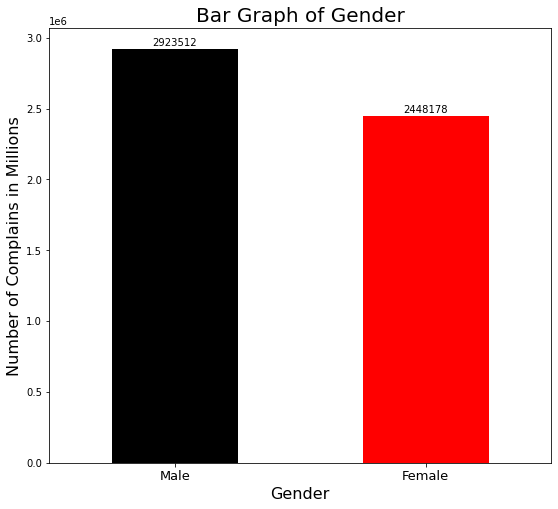

In [207]:
gender = new_df['Sex'].value_counts()
plt.figure(figsize=(9, 8))
ax = gender.plot(kind='bar', rot=0, color=['black', 'red'])
ax.set_title("Bar Graph of Gender", y = 1, fontsize=20)
ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('Number of Complains in Millions', fontsize=16)
ax.set_xticklabels(('Male', 'Female'), fontsize=13)


for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

(0.0, 1500000.0)

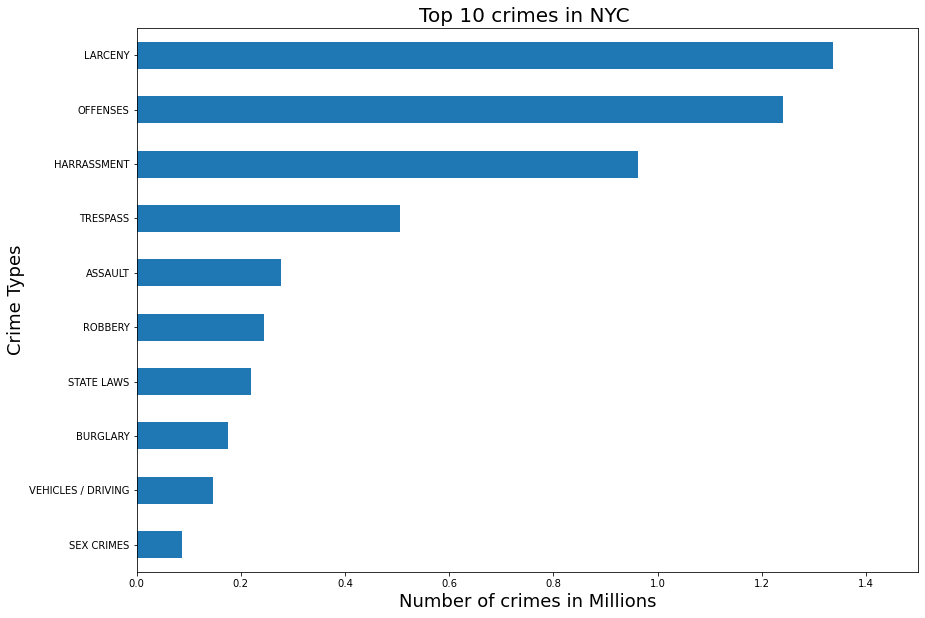

In [322]:

Tcrime = new_df.OFNS_DESC.value_counts().iloc[:10].sort_values()
plt.figure(figsize=(14, 10))
ax = Tcrime.plot(kind='barh' ,rot=0)
ax.set_title("Top 10 crimes in NYC ", y = 1, fontsize=20)
ax.set_ylabel('Crime Types', fontsize=18)
ax.set_xlabel('Number of crimes in Millions', fontsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim([0, 1500000])



                                                           

(200000.0, 2000000.0)

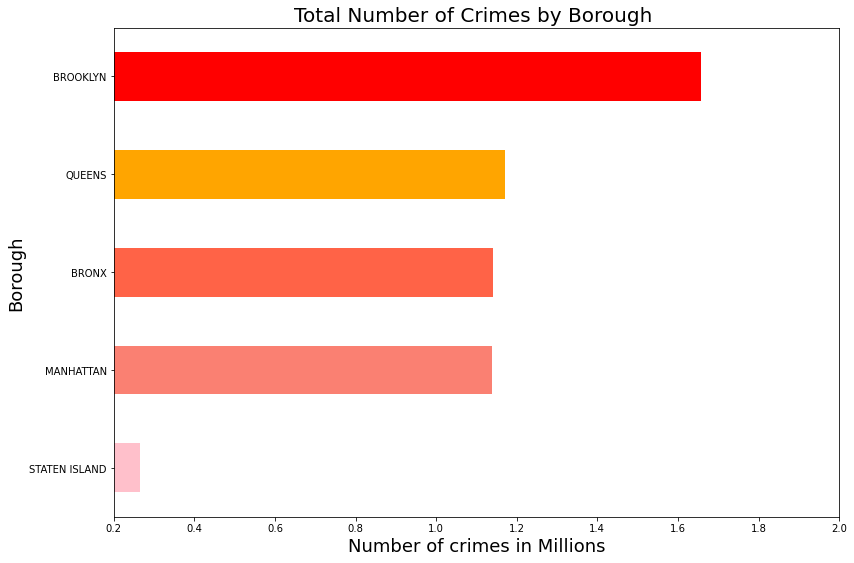

In [329]:
Boro = new_df['Borough_Name'].value_counts().sort_values()

plt.figure(figsize=(13, 9))
ax = Boro.plot(kind='barh',color=['pink', 'Salmon','Tomato','orange','red'] ,rot=0)
ax.set_title("Total Number of Crimes by Borough ", y = 1, fontsize=20)
ax.set_ylabel('Borough', fontsize=18)
ax.set_xlabel('Number of crimes in Millions', fontsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim([200000, 2000000])

#plt.xticks([200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000])






(2005.0, 2022.0)

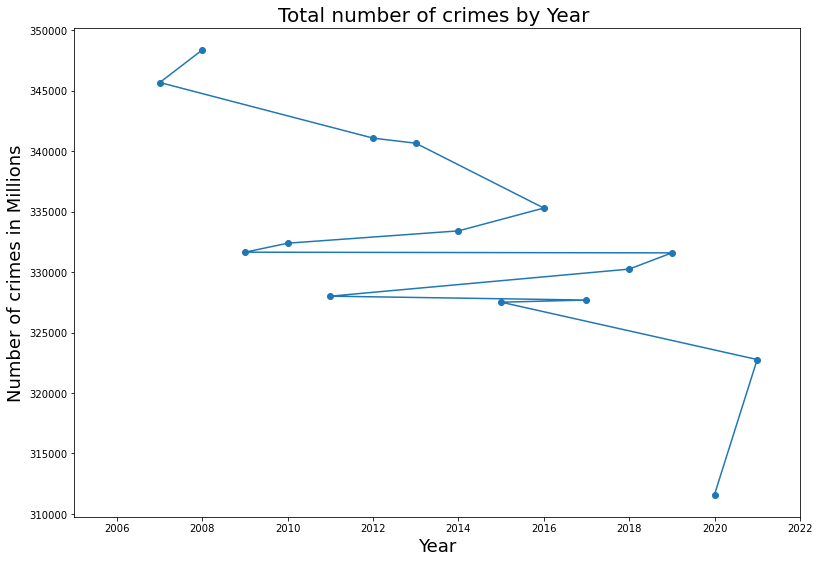

In [320]:

time = new_df[(new_df['Occurance_Date'] > '2007-1-1')]


time = time.set_index("Occurance_Date")

time['year'] = time.index.year
time['month'] = time.index.month



plt.figure(figsize=(13, 9))


ax = time['year'].value_counts().plot(kind='line', linestyle = '-', marker = 'o' ,rot=0)
ax.set_title("Total Number of Crimes by Year ", y = 1, fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Number of crimes in Millions', fontsize=18)



plt.xlim([2005, 2022])






(100000.0, 500000.0)

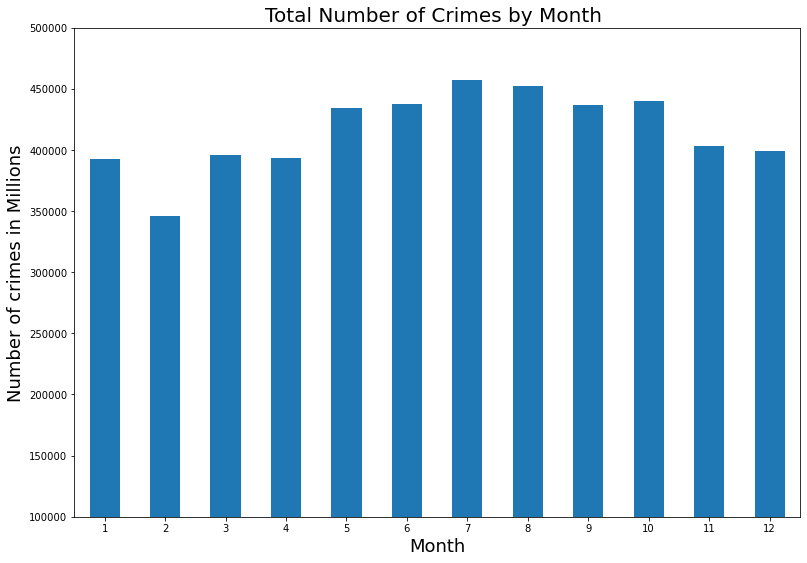

In [328]:
# Crimes by month

month = time.groupby('month').size()


plt.figure(figsize=(13, 9))
ax = month.plot(kind='bar',rot=0)
ax.set_title("Total Number of Crimes by Month ", y = 1, fontsize=20)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Number of crimes in Millions', fontsize=18)


plt.ylim([100000, 500000])



#plt.xlim([2005, 2022])



(100000.0, 2000000.0)

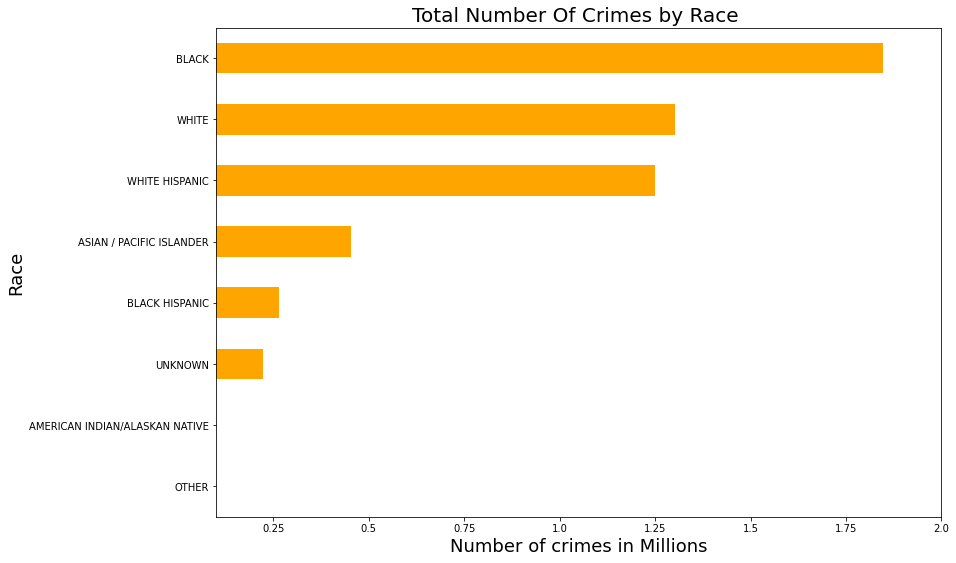

In [331]:
Race = new_df['Race'].dropna()
Race = Race.value_counts().sort_values()
plt.figure(figsize=(13, 9))
ax = Race.plot(kind='barh' ,color ='orange' ,rot=0)
ax.set_title("Total Number Of Crimes by Race ", y = 1, fontsize=20)
ax.set_ylabel('Race', fontsize=18)
ax.set_xlabel('Number of crimes in Millions', fontsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim([100000, 2000000])

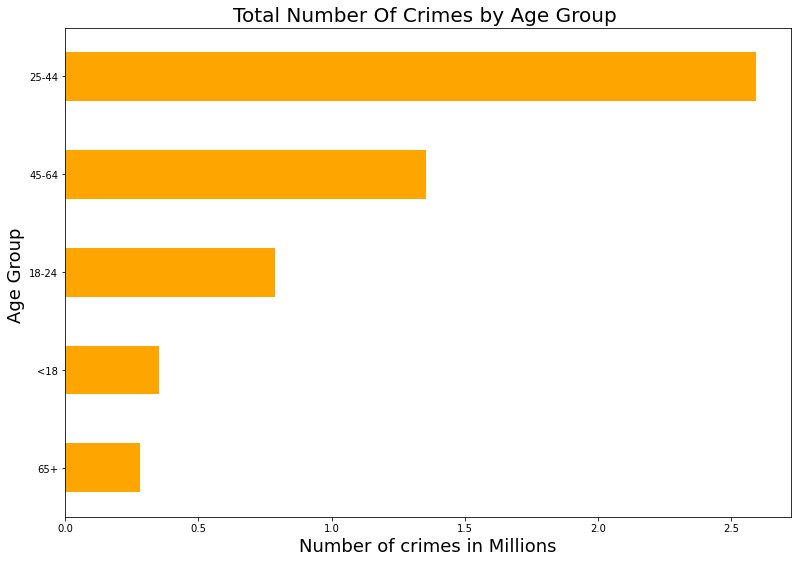

In [339]:
Age = new_df['Age_Group'].value_counts().sort_values()
plt.figure(figsize=(13, 9))
ax = Age.plot(kind='barh' ,color ='orange' ,rot=0)
ax.set_title("Total Number Of Crimes by Age Group ", y = 1, fontsize=20)
ax.set_ylabel('Age Group ', fontsize=18)
ax.set_xlabel('Number of crimes in Millions', fontsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

#plt.xlim([100000, 2000000])